In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

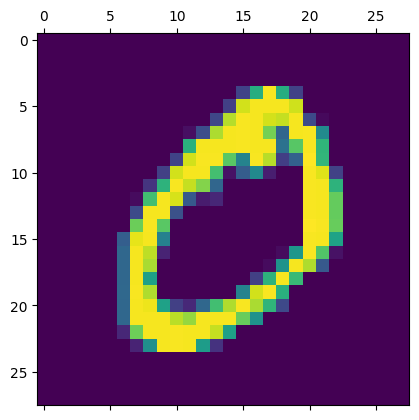

In [3]:
plt.matshow(x_train[1])

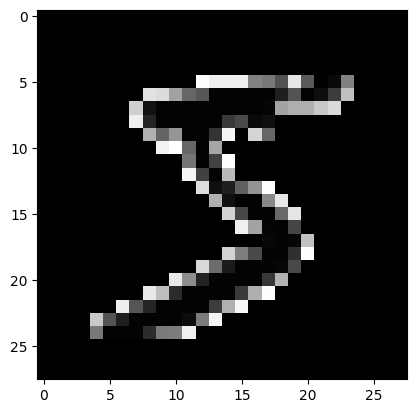

In [4]:
plt.imshow(-x_train[0],cmap="gray")

In [5]:
x_train = x_train/255
x_test = x_test/255

In [6]:
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28,28)),
keras.layers.Dense(128, activation="relu"),
keras.layers.Dense(10, activation="softmax")    
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.compile(optimizer="sgd",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])

In [8]:
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.6391 - accuracy: 0.8394 - val_loss: 0.3580 - val_accuracy: 0.9028
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3383 - accuracy: 0.9051 - val_loss: 0.2981 - val_accuracy: 0.9171
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2915 - accuracy: 0.9182 - val_loss: 0.2655 - val_accuracy: 0.9271
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2621 - accuracy: 0.9262 - val_loss: 0.2445 - val_accuracy: 0.9306
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2390 - accuracy: 0.9333 - val_loss: 0.2246 - val_accuracy: 0.9371
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2201 - accuracy: 0.9385 - val_loss: 0.2094 - val_accuracy: 0.9405
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2036 - accuracy: 0.9435 - val_loss: 0.1970 - val_ac

In [9]:
test_loss, test_acc=model.evaluate(x_test, y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.1650 - accuracy: 0.9515
Loss=0.165
Accuracy=0.951


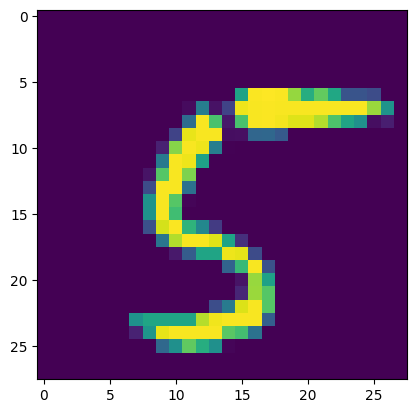

In [10]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

313/313 [==============================] - 1s 3ms/step


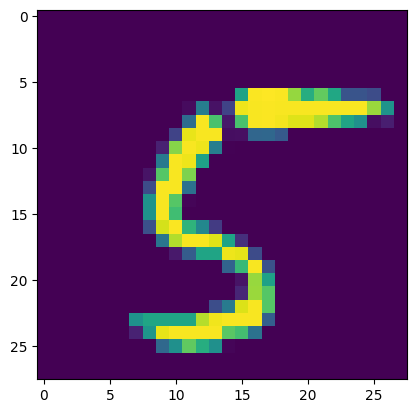

Predicted Value:  [2.3008583e-03 8.6483396e-07 1.5752697e-05 5.0029419e-05 4.0700324e-05
 9.9572659e-01 6.8672597e-07 2.2367320e-04 1.3182310e-03 3.2266308e-04]


In [11]:
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()
print('Predicted Value: ', predicted_value[n])

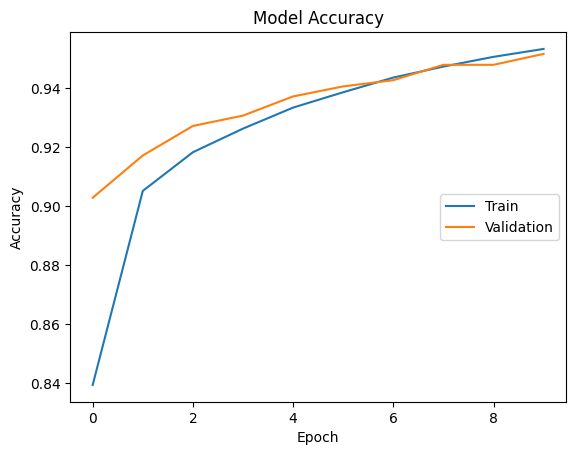

In [12]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='center right')
plt.show()

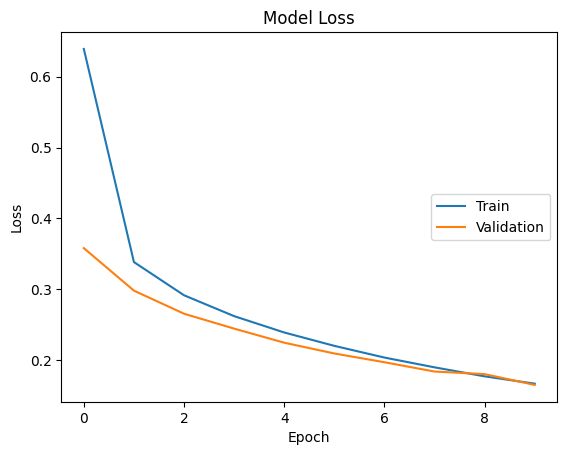

In [13]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='center right')
plt.show()